In [1]:
import sys
import spg_etalon
import numpy as np
sys.path.append('../functions')
import et_mueller2 as etm

from matplotlib import pyplot as plt
import time
from scipy import integrate as intgrl



In [2]:
tolerance = 1e-05

a=spg_etalon.EtalonProp()
a.show()

print('----------\n')
print('in python:\n')
print('wave: ',etm.wvl0)
print('m: ',etm.m)
print('wvl: ', etm.wvl)
print('delta_h: ',etm.delta_h)
print('Finesse',etm.F , a.f)
print('----------\n')

deltao1 = spg_etalon.deltao(a,a.wvl0,0.1) 
deltao2 = etm.deltao(a.wvl0,0.1) 
print('Deltao matches Python: ',np.isclose(deltao1,deltao2, rtol= tolerance),deltao1,deltao2)

deltae1 = spg_etalon.deltae(a,a.wvl0,0.1,0.2) 
deltae2 = etm.deltae(a.wvl0,0.1,0.2) 
print('Deltae matches Python: ',np.isclose(deltae1,deltae2, rtol= tolerance),deltae1,deltae2)

print('----H11-H22------')

print('H11 - py', etm.H11(a.wvl0,0.1))
print('H11 - ru', spg_etalon.h11(a,a.wvl0,0.1) )
print('H22 - py', etm.H22(a.wvl0,0.1,0.1))
print('H22 - ru', spg_etalon.h22(a,a.wvl0,0.1,0.1) )

----------
---------------------------------------------------------
(wvl0) Central wavelength [m]:            +6.173e-7
(fnum) f number:                          63.5
(no) Ord. refraciton index:               2.29
(ne) Ext. refraciton index:               2.29
(h) Etalon thickness [m]:                 +2.500207171521161e-4
(r) Reflectivity:                         0.92
(a) Absorptance:                          0
(wvl) Peak wavelength [m]:                +6.173018245588635e-7
(m) Order of the resonance peak:          1855
(d_h) Thickness var. to tune to wvl0 [m]: +2.0717152116101468e-8
(tau) Transmittance:                      1
(fin) Finesse:                            575.0000000000006
(rp) pupil radius [m]:                    0.00875
(f) focal [m]:                            1.11125
(tol) Tolerance:                          +1e-10
---------------------------------------------------------

in python:

wave:  6.173e-07
m:  1855
wvl:  6.173018245588635e-07
delta_h:  2.0717152116101468e

In [3]:
print('----H11pintr------')

#Spectral parameters
wvl0 = etm.wvl0 #Central wavelength (617.3 nm)
print('wave: ',etm.wvl0,'\n')
delta_1 = 60e-12 #Lower boundary of the wavelength range
delta_2 = 60e-12 #Upper boundary of the wavelength range
Nl = 121 #Number of wavelengths for the sampling of the profiles
wvlv = wvl0 + np.linspace(-delta_1, delta_2, Nl) #Wavelengths vector

#Simulation parameters
Rp=17.5e-3/2 #Pupil radius
fnum=etm.fnum #Telescope f-number
f=2*Rp*fnum #Focal

#llama a transm_fdt
#atilde=fdt.transm_fdt( x = 0.1, y = 0, wvlv ,tiltx = 0.0, tilty = 0.0 , teldegree = 0.23)

tiltx = 0
tilty = 0
theta3 = 0 #Optical axis direction of the etalon
teldegree=0.23

theta0x = tiltx * np.pi/180 #Chief ray angle incidence in X direction at etalon center
theta0y = tilty * np.pi/180 # Chief ray angle of incidene in Y direction at etalon center
theta_tel = teldegree*np.pi/180 #Nominal degree of telecentrism center-border

#Coordinates
xi0 = f * theta0x
eta0 = f * theta0y
xi_lim = f * theta_tel #FOV [m]
x = 0.0
y = 0.0
xi = x * xi_lim + xi0
eta = y * xi_lim + eta0

spg_etalon.h11pintr(0, 0, a, xi, eta, xi, eta, wvlv[10], theta3)


----H11pintr------
wave:  6.173e-07 



-0.0

In [4]:
print('----H11pintr------')

#Spectral parameters
wvl0 = etm.wvl0 #Central wavelength (617.3 nm)
print('wave: ',etm.wvl0,'\n')
delta_1 = 60e-12 #Lower boundary of the wavelength range
delta_2 = 60e-12 #Upper boundary of the wavelength range
Nl = 121 #Number of wavelengths for the sampling of the profiles
wvlv = wvl0 + np.linspace(-delta_1, delta_2, Nl) #Wavelengths vector

#Simulation parameters
Rp=17.5e-3/2 #Pupil radius
fnum=etm.fnum #Telescope f-number
f=2*Rp*fnum #Focal

#llama a transm_fdt
#atilde=fdt.transm_fdt( x = 0.1, y = 0, wvlv ,tiltx = 0.0, tilty = 0.0 , teldegree = 0.23)

tiltx = 0
tilty = 0
theta3 = 0 #Optical axis direction of the etalon
teldegree=0.23

theta0x = tiltx * np.pi/180 #Chief ray angle incidence in X direction at etalon center
theta0y = tilty * np.pi/180 # Chief ray angle of incidene in Y direction at etalon center
theta_tel = teldegree*np.pi/180 #Nominal degree of telecentrism center-border

#Coordinates
xi0 = f * theta0x
eta0 = f * theta0y
xi_lim = f * theta_tel #FOV [m]
x = 0.00000001
y = 0.0
xi = x * xi_lim + xi0
eta = y * xi_lim + eta0

lims = [[0,Rp],[0,2*np.pi]]

n = 10
Rp_lims = np.linspace(0,Rp, n)
an_lims = np.linspace(0,2*np.pi, n)

start = time.time()
f1 = np.zeros((Nl,n,n))
for i,ii in enumerate(Rp_lims):
    for j,jj in enumerate(Rp_lims):
        for ki,kki in enumerate(wvlv):
            k = 2*np.pi/kki
            f1[ ki, i, j ] = etm.H11pintr(ii, jj,  xi, eta, xi, eta, k, f, kki, theta3)
end = time.time()
print('Python time:',(end - start)/60.)

start = time.time()
f2 = np.zeros((Nl,n,n))
for i,ii in enumerate(Rp_lims):
    for j,jj in enumerate(Rp_lims):
        for ki,kki in enumerate(wvlv):
            f2[ ki, i, j ] = spg_etalon.h11pintr(ii, jj, a, xi, eta, xi, eta, kki, theta3)
end = time.time()
print('rust  time:',(end - start)/60.)

check = np.isclose(f1,f2, rtol= tolerance)
if not check.all():
    print('ERROR H11pintr')
else:
    print('H11pintr matches Python')

py_H11pintr = etm.H11pintr(0, 0,  xi, eta, xi, eta, k, f, wvlv[0], theta3)
print('Python H11pintr: ',py_H11pintr)

ru_H11pintr = spg_etalon.h11pintr(0, 0, a, xi, eta, xi, eta, wvlv[0], theta3)
print('Rust H11pintr:   ',ru_H11pintr)

check = np.isclose(f1,f2, rtol= tolerance)
if not check.all():
    print('ERROR H11pintr')
else:
    print('H11pintr matches Python')

#********
# CHECK H11ti

start = time.time()
f1 = np.zeros((Nl,n,n))
for i,ii in enumerate(Rp_lims):
    for j,jj in enumerate(Rp_lims):
        for ki,kki in enumerate(wvlv):
            k = 2*np.pi/kki
            f1[ ki, i, j ] = etm.H11pinti(ii, jj,  xi, eta, xi, eta, k, f, kki, theta3)
end = time.time()
print('Python time:',(end - start)/60.)

start = time.time()
f2 = np.zeros((Nl,n,n))
for i,ii in enumerate(Rp_lims):
    for j,jj in enumerate(Rp_lims):
        for ki,kki in enumerate(wvlv):
            f2[ ki, i, j ] = spg_etalon.h11pinti(ii, jj, a, xi, eta, xi, eta, kki, theta3)
end = time.time()
print('rust  time:',(end - start)/60.)

check = np.isclose(f1,f2, rtol= tolerance)
if not check.all():
    print('ERROR H11pintr')
else:
    print('H11pinti matches Python')

py_H11pinti = etm.H11pinti(0, 0,  xi, eta, xi, eta, k, f, wvlv[0], theta3)
print('Python H11pinti: ',py_H11pinti)

ru_H11pinti = spg_etalon.h11pinti(0, 0, a, xi, eta, xi, eta, wvlv[0], theta3)
print('Rust H11pinti:   ',ru_H11pinti)

check = np.isclose(f1,f2, rtol= tolerance)
if not check.all():
    print('ERROR H11pinti')
else:
    print('H11pinti matches Python')


----H11pintr------
wave:  6.173e-07 

Python time: 0.0015421470006306967
rust  time: 0.0009832143783569335
H11pintr matches Python
Python H11pintr:  -0.0
Rust H11pintr:    -0.0
H11pintr matches Python
Python time: 0.0002991000811258952
rust  time: 0.0007507165273030598
H11pinti matches Python
Python H11pinti:  -0.0
Rust H11pinti:    -0.0
H11pinti matches Python


in:  0.0 0.0 0.0
out:  0.0 0.0 0.0
fr2:  [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


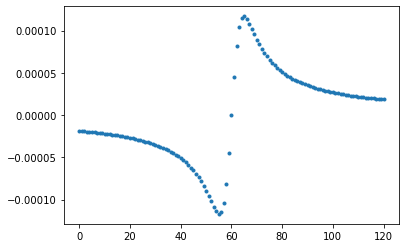

In [7]:
#Integration
Rp=17.5e-3/2 #Pupil radius
fnum=etm.fnum #Telescope f-number
Nl = 121

tiltx = 0.0
tilty = 0.0
x = 0.0
y = 0.0
teldegree = 0.23
#Etalon parameters
theta0x=tiltx*np.pi/180#Chief ray angle incidence in X direction at etalon center
theta0y=tilty*np.pi/180# Chief ray angle of incidene in Y direction at etalon center
theta3=0.0 #Optical axis direction of the etalon
theta_tel=teldegree*np.pi/180 #Nominal degree of telecentrism center-border

f=2*Rp*fnum #Focal
xi0=f*theta0x
eta0=f*theta0y
xi_lim=f*theta_tel #FOV [m]
xi=x*xi_lim+xi0
eta=y*xi_lim+eta0

delta_1=60e-12 #Lower boundary of the wavelength range
delta_2=60e-12 #Upper boundary of the wavelength range
wvlv=etm.wvl0+np.linspace(-delta_1,delta_2,Nl) #Wavelengths vector

start = time.time()
f1r = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    inte = intgrl.nquad(etm.H11pinti,lims,args=params)
    f1r[ ki ] = inte[0]

print('in: ',xi,eta,theta3)
f2r = spg_etalon.integrateh11pinti(a, xi, eta, xi, eta, theta3) 
print('out: ',xi,eta,theta3)
plt.plot(f1r,'.')
plt.plot(f2r)
print('fr2: ',f2r)


python  time: 0.0027430375417073567
0 0.00875 100 0 6.283185307179586 100 0.00000000006 0.00000000006 121 0.000000000001
rust  time: 0.00854009787241618
ERROR integrate


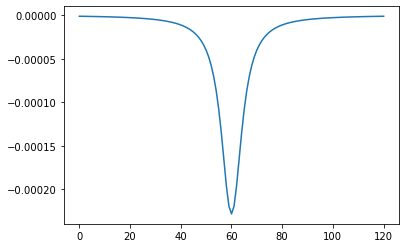

python  time: 0.0017181833585103352
rust  time: 0.009305799007415771
ERROR integrate


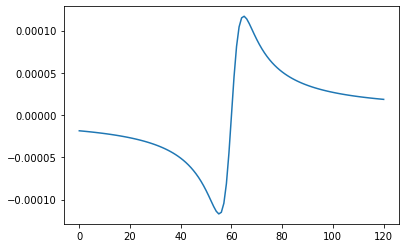

rust  time (*): 0.02900786797205607
ERROR integrate
ERROR integrate
ERROR integrate
ERROR integrate


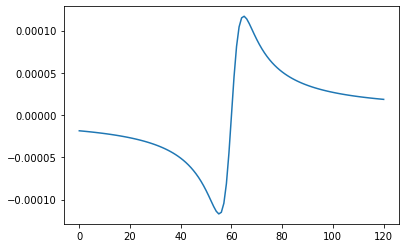

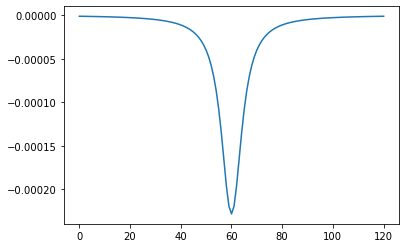

python  time: 0.0020768324534098308
rust  time (*): 0.00546875


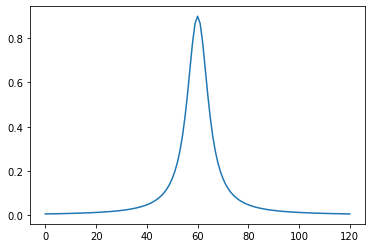

In [ ]:
#Integration
Rp=17.5e-3/2 #Pupil radius
fnum=etm.fnum #Telescope f-number
Nl = 121

tiltx = 0.0
tilty = 0.0
x = 0.0
y = 0.0
teldegree = 0.23
#Etalon parameters
theta0x=tiltx*np.pi/180#Chief ray angle incidence in X direction at etalon center
theta0y=tilty*np.pi/180# Chief ray angle of incidene in Y direction at etalon center
theta3=0.0 #Optical axis direction of the etalon
theta_tel=teldegree*np.pi/180 #Nominal degree of telecentrism center-border

f=2*Rp*fnum #Focal
xi0=f*theta0x
eta0=f*theta0y
xi_lim=f*theta_tel #FOV [m]
xi=x*xi_lim+xi0
eta=y*xi_lim+eta0

delta_1=60e-12 #Lower boundary of the wavelength range
delta_2=60e-12 #Upper boundary of the wavelength range
wvlv=etm.wvl0+np.linspace(-delta_1,delta_2,Nl) #Wavelengths vector

start = time.time()
f1r = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    inte = intgrl.nquad(etm.H11pintr,lims,args=params)
    f1r[ ki ] = inte[0]

end = time.time()
print('python  time:',(end - start)/60.)

start = time.time()
f2r = spg_etalon.integrateh11pintr(a, xi, eta, xi, eta, theta3) 

end = time.time()
print('rust  time:',(end - start)/60.)

check = np.isclose(f1r,f2r, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')

plt.plot(f1r)
plt.plot(f2r,'.')
plt.show()


#Integration with the other term

###########################
start = time.time()
f1i = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    # H11tr = intgrl.nquad(etm.H11pintr,lims,args=params,opts=limit)
    inte = intgrl.nquad(etm.H11pinti,lims,args=params)
    # H11t = (H11tr[0]+1j*H11ti[0]) / (np.pi*Rp**2)
    f1i[ ki ] = inte[0]

end = time.time()
print('python  time:',(end - start)/60.)


start = time.time()
f2i = np.zeros((Nl))
f2i = spg_etalon.integrateh11pinti(a, xi, eta, xi, eta, theta3) 

end = time.time()
print('rust  time:',(end - start)/60.)

check = np.isclose(f1i,f2i, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')

plt.plot(f1i)
plt.plot(f2i,'.')
plt.show()

start = time.time()
f3 = np.array(spg_etalon.integratec(a, xi, eta, xi, eta, theta3))

end = time.time()
print('rust  time (*):',(end - start)/60.)

check = np.isclose(f1i,f3.imag, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')
check = np.isclose(f2i,f3.imag, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')
check = np.isclose(f1r,f3.real, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')
check = np.isclose(f1r,f3.real, rtol= tolerance)
if not check.all():
    print('ERROR integrate')
else:
    print('integrate matches Python')

plt.plot(f1i)
plt.plot(f2i,'.')
plt.plot(f3.imag,'.-')
plt.show()
plt.plot(f1r)
plt.plot(f2r,'.')
plt.plot(f3.real,'.-')
plt.show()

########################### FULL
start = time.time()
tr1 = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    H11tr = intgrl.nquad(etm.H11pintr,lims,args=params)
    H11ti = intgrl.nquad(etm.H11pinti,lims,args=params)
    H11t = (H11tr[0]+1j*H11ti[0]) / (np.pi*Rp**2)
    tr1[ ki ],_ ,_ ,_ = etm.abcd(H11t,H11t)

end = time.time()
print('python  time:',(end - start)/60.)

start = time.time()
tr2 = np.array(spg_etalon.integrate(a, xi, eta, xi, eta, theta3))

end = time.time()
print('rust  time (*):',(end - start)/60.)

plt.plot(tr1)
plt.plot(tr2,'.')
plt.show()

    # """
    # Integrals to calculate a,b,c,d Mueller matrix coefficients
    # """
    # i=-1 #Spectral index
    # lims=[[0,Rp],[0,2*np.pi]]
    # atilde=np.zeros(wvl.shape[0])

    # print('Computation of integrals...')
    # wvli = wvl[0]
    
    # i+=1
    # k=2*np.pi/wvli

    # params=(xi,eta,xi,eta,k,f,wvli,theta3) #xi0=xi; eta0=eta
    # limit={'limit':50}
    # H11tr=intgrl.nquad(etm.H11pintr,lims,args=params,opts=limit)
    # H11ti = 0
    # # H11ti=intgrl.nquad(etm.H11pinti,lims,args=params,opts=limit)
    # H11t=(H11tr[0]+1j*H11ti[0])/(np.pi*Rp**2)
    # #abcd
    # atilde[i],btilde,ctilde,dtilde=etm.abcd(H11t,H11t)


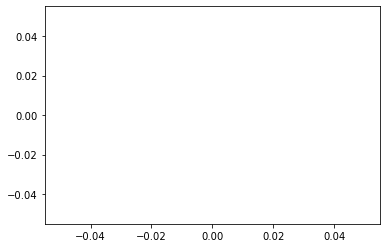

In [8]:
plt.plot(tr2)

In [9]:
def simpson(lims,params):
    startx = lims[0][0]
    endx = lims[0][1]
    stepsx = 6
    starty = lims[1][0]
    endy =lims[1][1]
    stepsy = 6

    stepx = (endx - startx) / stepsx 
    stepy = (endy - starty) / stepsy

    result = 0
    for i in range(stepsx+1):
        x = startx + stepx * i
        for j in range(stepsy + 1):
            if i%2:
                weight = 4.0
            else:
                weight = 2.0
            y = starty + stepy * j
            if (i == 0 or i == stepsx) and (j == 0 or j == stepsy): 
                weight = 1.0
            elif i == 0 or i == stepsx: 
                if j%2:
                    weight = 4.0
                else:
                    weight = 2.0
            elif j == 0 or j == stepsy: 
                if i%2:
                    weight = 4.0
                else:
                    weight = 2.0
            else:
                if j%2:
                    weight *= 4.0
                else:
                    weight *= 2.0
            # print(i,j,weight)
            result += etm.H11pintr(x,y,params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7])*weight
    result *= stepx * stepy / 9.0

    return result

ZeroDivisionError: division by zero

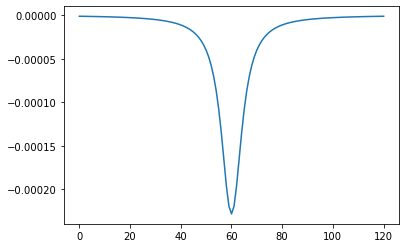

In [10]:
f1 = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    inte = intgrl.nquad(etm.H11pintr,lims,args=params)
    f1[ ki ] = inte[0]

plt.plot(f1)

f1s = np.zeros((Nl))
for ki,kki in enumerate(wvlv):
    k = 2*np.pi/kki
    params=(xi,eta,xi,eta,k,f,kki,theta3) #xi0=xi; eta0=eta
    inte = simpson(lims,params)
    f1s[ ki ] = inte

plt.plot(f1s,'.')

plt.show()
